In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')
train_dir = 'data/train'

if  not os.path.exists(os.path.join(train_dir, 'cat')):
    os.mkdir(os.path.join(train_dir, 'cat'))
if  not os.path.exists(os.path.join(train_dir, 'dog')):
    os.mkdir(os.path.join(train_dir, 'dog'))

In [3]:
for file in os.listdir(train_dir):
    if file[-3:] == 'jpg':
        if file[:3] == 'cat':
            os.replace(os.path.join(train_dir, file), os.path.join(train_dir, 'cat', file))
        else:
            os.replace(os.path.join(train_dir, file), os.path.join(train_dir, 'dog', file))

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    validation_split = 0.2,
    subset = 'training',
    seed = 0
)

validation_data_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    validation_split = 0.2,
    subset = 'validation',
    seed = 0
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


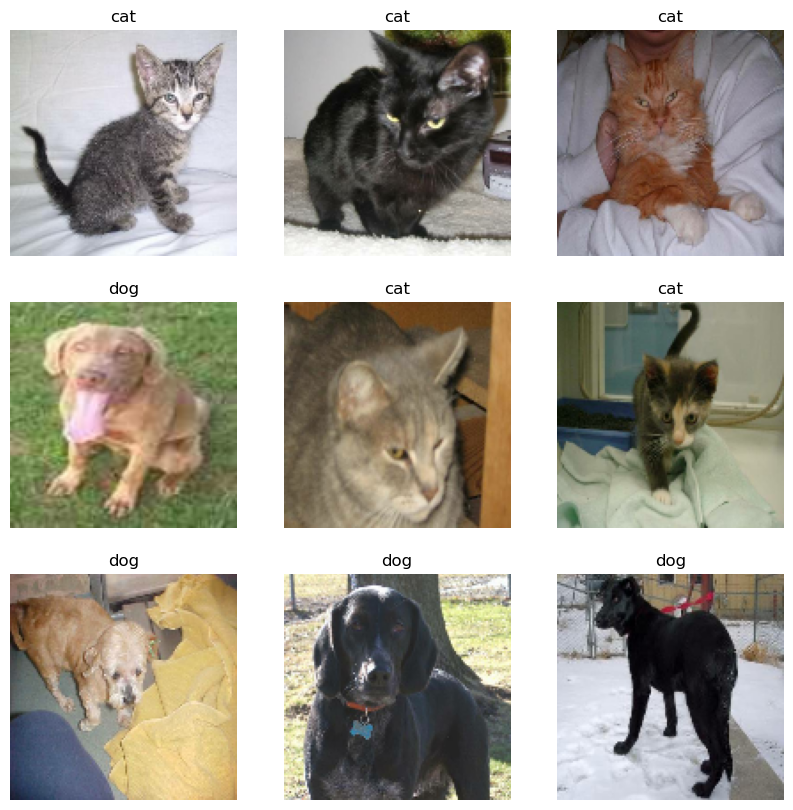

In [5]:
class_names = train_data_set.class_names

plt.figure(figsize = (10, 10))
for images, labels in train_data_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis('off')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPool2D, Flatten, Dense

# Design the model architecture
model = Sequential([
    Input(shape = (128, 128, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(2, activation = 'sigmoid')  # Cat or dog  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [7]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],)

In [8]:
history = model.fit(train_data_set,
                    steps_per_epoch = 100,
                    epochs = 10,
                    validation_data = validation_data_set, 
                    validation_steps = 10)

Epoch 1/10
100/100 [==============================] - 39s 363ms/step - loss: 25.9491 - accuracy: 0.5278 - val_loss: 0.7800 - val_accuracy: 0.5031
Epoch 2/10
100/100 [==============================] - 37s 367ms/step - loss: 1.1987 - accuracy: 0.5131 - val_loss: 0.6852 - val_accuracy: 0.5094
Epoch 3/10
100/100 [==============================] - 38s 380ms/step - loss: 0.7500 - accuracy: 0.5534 - val_loss: 0.6963 - val_accuracy: 0.5688
Epoch 4/10
100/100 [==============================] - 38s 384ms/step - loss: 0.7492 - accuracy: 0.5819 - val_loss: 0.6102 - val_accuracy: 0.7000
Epoch 5/10
100/100 [==============================] - 38s 378ms/step - loss: 0.6790 - accuracy: 0.6059 - val_loss: 0.6546 - val_accuracy: 0.6062
Epoch 6/10
100/100 [==============================] - 37s 374ms/step - loss: 0.6580 - accuracy: 0.6400 - val_loss: 0.6087 - val_accuracy: 0.6750
Epoch 7/10
100/100 [==============================] - 14s 133ms/step - loss: 0.6314 - accuracy: 0.6700 - val_loss: 0.5744 - val_a

In [9]:
results = model.evaluate(validation_data_set)

157/157 [==============================] - 17s 106ms/step - loss: 0.5964 - accuracy: 0.6928


In [10]:
print(f'CNN has {results[0]} loss and {results[1]} accuracy score')

CNN has 0.5963909029960632 loss and 0.692799985408783 accuracy score
